# Natural Language Processing - NLP

Natural Language Processing (NLP): You’ve been handed a large collection of text documents (akin to the 20 Newsgroups dataset) representing community forum posts. Your task is to quickly categorize or label these posts so that the support team can route questions to the right channels more efficiently.

NLP: Classify or label textual data efficiently, unlocking the potential hidden in free-form text.

# Connect to the Scenario

You have a large set of forum or user-post data that needs categorization to streamline support requests. Imagine receiving posts about technical issues, general inquiries, and miscellaneous topics.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Business Goal**

A mid-sized analytics firm is collaborating with a large online platform that hosts user-generated forum content spanning technical, recreational, scientific, and political topics. As the volume of posts grows, the support team faces increasing difficulty manually reviewing and routing messages to the appropriate departments.

To streamline this process, the firm aims to implement a Natural Language Processing (NLP) solution capable of automatically classifying forum posts into predefined categories. This will ensure that user queries are efficiently routed, reducing response time, minimizing operational burden, and enhancing overall user satisfaction.

The project’s objective is to develop a scalable, high-accuracy text classification model—initially trained on the 20 Newsgroups dataset—that generalizes well to new inputs and can be readily adapted to client-specific data with minimal retraining. By transforming unstructured text into structured insights, the solution enables intelligent automation, freeing human resources for more strategic, value-added tasks.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Target Variable**

The dataset comprises thousands of user generated forum posts collected from the 20 Newsgroups corpus, representing diverse discussions in categories such as comp.graphics, rec.autos, sci.space, and talk.politics.misc. Each document is associated with a predefined topic label, which serves as our target variable for supervised text classification.

This categorical target enables us to train a machine learning model to predict the appropriate topic label for new, unseen forum posts. Automating this classification task ensures that each post is routed to the correct department—whether it involves technical support, product feedback, or general inquiries.

By accurately modeling this target variable, we can unlock meaningful patterns in free-form text data and generate structured outputs that support organizational goals such as faster support resolution, targeted user engagement, and improved service quality at scale.



<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Strategic Advantages**

- Operational Efficiency: Automatically routing user queries to the right department drastically reduces support wait times and minimizes the need for manual triage.

- Scalable Support Infrastructure: As the user base and post volume grow, the classification model continues to perform consistently, without needing to expand the support team linearly.

- Insight Generation: Structured labels open the door to trend tracking and community analytics—identifying frequent issues, popular discussion topics, and sentiment shifts across categories.

- Cross-Domain Generalization: The same classification framework can be adapted to similar NLP tasks like ticket triage, spam detection, or topic modeling in other domains.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Text Classification Strategy**

We begin by loading a curated subset of the 20 Newsgroups dataset, representing the four diverse categories: comp.graphics, rec.autos, sci.space, and talk.politics.misc. These categories simulate the range of posts found in real-world community forums, from technical queries to policy debates.

Our initial focus is on understanding the distribution and structure of the text data. We tokenize, clean, and preprocess the posts using tools like NLTK to remove stopwords, apply lemmatization, and normalize case and punctuation.

Once the data is cleaned, we will convert text into numerical representations using techniques such as Term Frequency-Inverse Document Frequency (TF-IDF). These vectorized features form the basis for training a supervised machine learning model—such as Multinomial Naive Bayes or Logistic Regression—for multi-class text classification.

Model performance will be evaluated using cross-validation and metrics like accuracy, precision, and recall. Visualization of class distributions and confusion matrices will aid interpretability and highlight opportunities for future model refinement.

# Load and Explore Text Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


# For dataset loading
from sklearn.datasets import fetch_20newsgroups


# Set random seed for reproducibility
np.random.seed(42)


# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)


# Create a DataFrame for easier manipulation
df = pd.DataFrame({
   'text': newsgroups.data,
   'category': [newsgroups.target_names[target] for target in newsgroups.target]
})


# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


In [4]:
# Firts 5 rows of my data
df.head()

,text,category
0,From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...,comp.graphics
1,From: cdm@pmafire.inel.gov (Dale Cook)\nSubjec...,talk.politics.misc
2,From: rick@trystro.uucp (Richard Nickle)\nSubj...,sci.space
3,From: marshatt@feserve.cc.purdue.edu (Zauberer...,rec.autos
4,From: Clinton-HQ@Campaign92.Org (Clinton/Gore ...,talk.politics.misc


In [5]:
# Basic info from my columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2236 non-null   object
 1   category  2236 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [6]:
# Unique values 
df.nunique()

text        2236
category       4
dtype: int64

In [7]:
# How many exact duplicates?
df.duplicated().sum()   

0

In [8]:
# Check for Missing or Empty Texts
print("Missing texts:", df['text'].isnull().sum())
print("Empty texts:", (df['text'].str.strip() == '').sum())

Missing texts: 0
Empty texts: 0


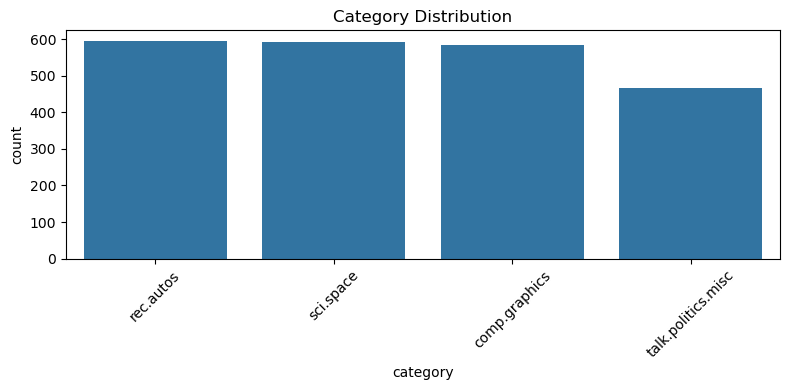

In [9]:
# Category Distribution Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Calculate text length statistics
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

# Display basic statistics
df[['text_length', 'word_count', 'sentence_count']].describe()

,text_length,word_count,sentence_count
count,2236.000000,2236.000000,2236.000000
mean,1918.330948,291.903846,16.249553
std,3850.168516,584.403700,32.945190
min,125.000000,15.000000,1.000000
25%,744.000000,104.000000,6.000000
50%,1157.500000,173.500000,10.000000
75%,1859.000000,290.000000,16.000000
max,60713.000000,9168.000000,536.000000


In [26]:
# Get top 5 shortest documents by character length
shortest_docs = df.loc[df['text'].str.len().nsmallest(5).index]

# Display index, length, and content
for idx, row in shortest_docs.iterrows():
    print(f"\nIndex: {idx}")
    print(f"Length: {len(row['text'])} characters")
    print("Text:")
    print(row['text'])


Index: 235
Length: 125 characters
Text:
From: hl7204@eehp22 (H L)
Subject: Re: Graphics Library Package
Organization: University of Illinois at Urbana
Lines: 2

  



Index: 1019
Length: 131 characters
Text:
From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: just testing
Organization: University of Waterloo
Lines: 3

hello testing




Index: 1619
Length: 160 characters
Text:
Organization: Arizona State University
From: <CXNBK@ASUACAD.BITNET>
Subject: Re: Celebrate Liberty! 1993
Lines: 5

Narrative, narrative, narrative. . .



C.B.


Index: 429
Length: 162 characters
Text:
Subject: E-mail of Michael Abrash?
From: gmontem@eis.calstate.edu (George A. Montemayor)
Organization: Calif State Univ/Electronic Information Services
Lines: 0



Index: 211
Length: 166 characters
Text:
From: will@rins.ryukoku.ac.jp (William Reiken)
Subject: Re: nuclear waste
Organization: Ryukoku Univ., Seta, Japan
Lines: 4


	Thanks for the Update.

							Will...



<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Entries with extremely limited content—some consisting of only a few characters or words. These minimal-length texts are often uninformative, lacking sufficient context or relevant keywords that would aid in classification or semantic analysis. As such, they pose a risk of introducing noise into the model and may negatively impact overall performance. It might be recommended to consider removing or flagging documents below a certain length threshold during preprocessing to ensure that the dataset retains only meaningful and analyzable content.

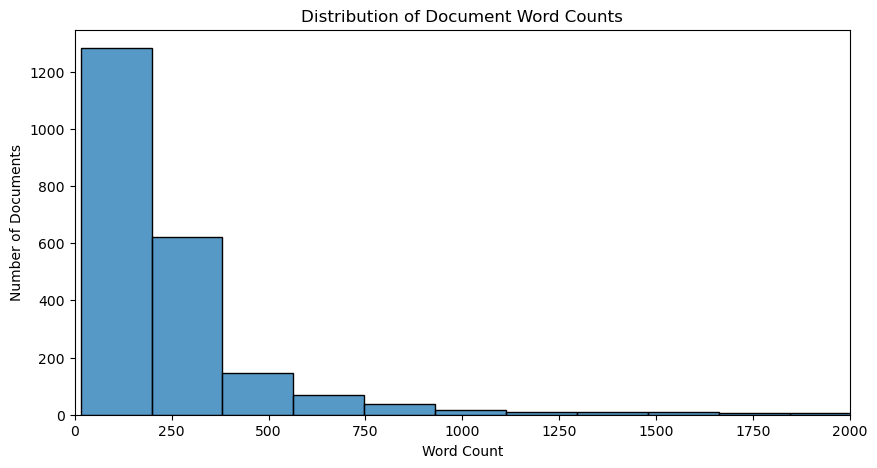

In [11]:
# Distribution of Document Word Counts
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=False)
plt.title("Distribution of Document Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Documents")
plt.xlim(0, 2000)
plt.show()

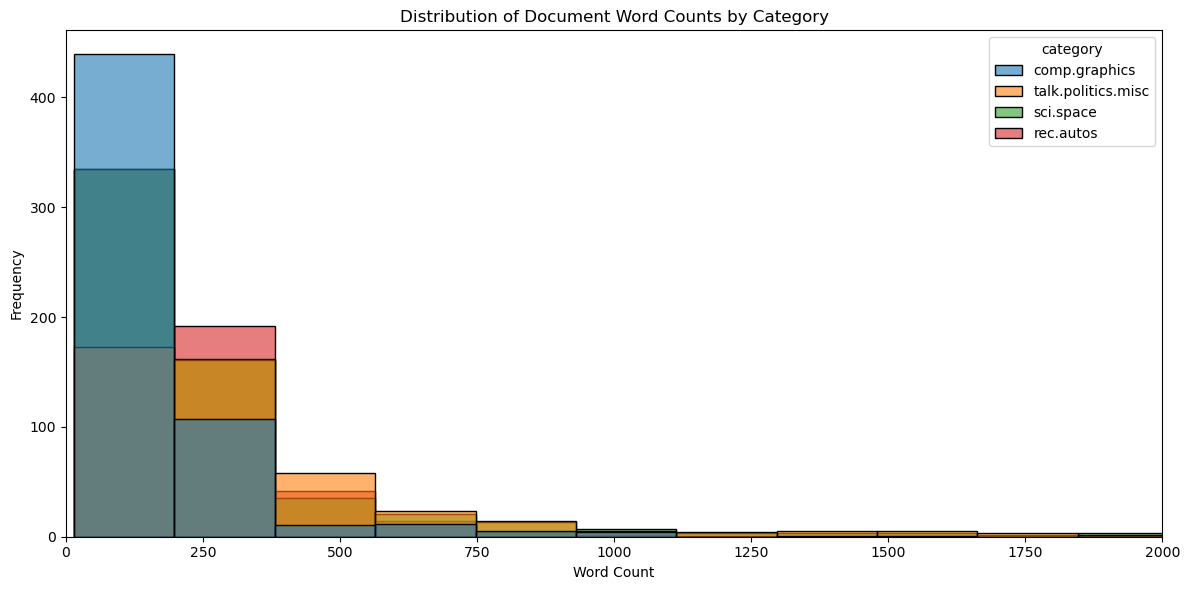

In [12]:
# Visualize document length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='category', bins=50, alpha=0.6)
plt.title('Distribution of Document Word Counts by Category')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # Focus on the main distribution
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The histogram above illustrates the distribution of word counts across documents, grouped by category. Most documents in all categories fall under 500 words, with a strong concentration between 0 and 250 words — especially in comp.graphics and sci.space. This indicates that the majority of user-generated posts are relatively concise.

However, there is a noticeable long tail of documents with higher word counts, particularly in the talk.politics.misc category, which contains a larger share of longer posts. These longer documents likely reflect opinionated discussions or detailed arguments common in political forums.

Overall, the distribution is right-skewed, with most documents being short but a small number extending to over 1,000 or even 1,500 words. This highlights the need to account for length variability during preprocessing, possibly by applying truncation, padding, or outlier handling to ensure model robustness and efficiency.

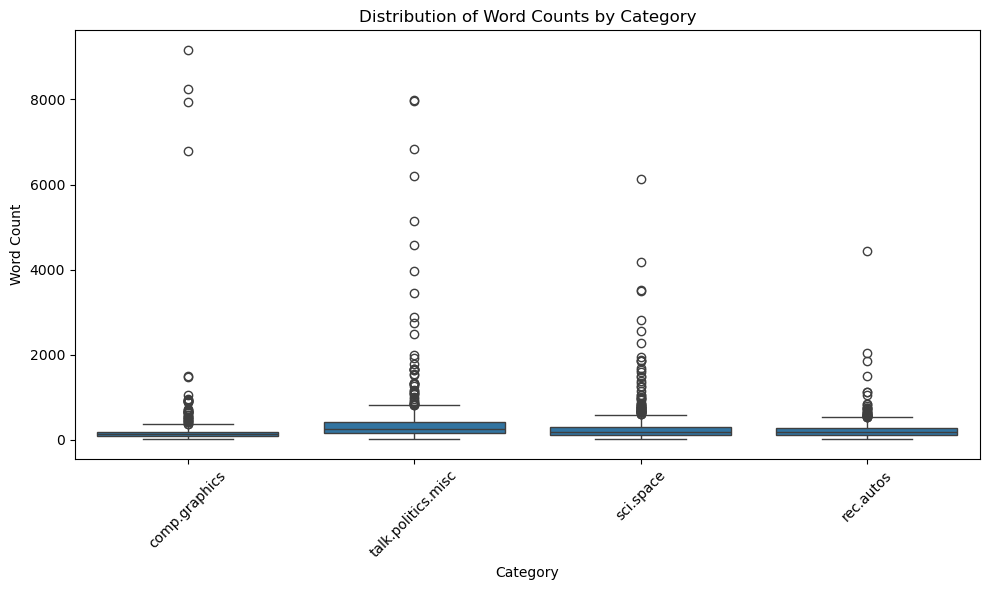

In [13]:
# Boxplot of Word Count by Category
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title("Distribution of Word Counts by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
The boxplot visualization of word counts by category appears visually compressed due to the presence of extreme outliers — documents with word counts exceeding 8,000 words. These unusually long entries, likely representing FAQs or highly detailed posts, distort the y-axis scaling and cause the core distribution (interquartile range) of most categories to appear flattened. While boxplots are effective for showing medians, spread, and outliers, such skewed data can obscure meaningful comparisons. To address this, we recommend applying axis limits, removing extreme outliers, or using a log-scale transformation to improve interpretability in future plots.

In [14]:
# Preview Long vs. Short Samples
print("\nShortest post:\n", df.loc[df['word_count'].idxmin(), 'text'][:500])
print("\nLongest post:\n", df.loc[df['word_count'].idxmax(), 'text'][:500])


Shortest post:
 From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: just testing
Organization: University of Waterloo
Lines: 3

hello testing




Longest post:
 From: tgl+@cs.cmu.edu (Tom Lane)
Subject: JPEG image compression: Frequently Asked Questions
Summary: Useful info about JPEG (JPG) image files and programs
Keywords: JPEG, image compression, FAQ
Supersedes: <jpeg-faq_733898461@g.gp.cs.cmu.edu>
Nntp-Posting-Host: g.gp.cs.cmu.edu
Reply-To: jpeg-info@uunet.uu.net
Organization: School of Computer Science, Carnegie Mellon
Expires: Sun, 16 May 1993 21:39:30 GMT
Lines: 1027

Archive-name: jpeg-faq
Last-modified: 18 April 1993

This FAQ article discusse


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

We loaded a curated subset of the 20 Newsgroups dataset focused on four diverse discussion categories: rec.autos, sci.space, comp.graphics, and talk.politics.misc. The final dataset consists of 2,236 unique posts, each labeled with one of the four categories and with no missing or duplicate entries, ensuring data integrity.

Category Distribution: 
The dataset shows a relatively balanced distribution across most categories, with talk.politics.misc slightly underrepresented at 465 posts compared to ~590 in the others. This minor class imbalance should be noted during model evaluation.

Text Length Analysis: Word counts range from as low as 15 words to over 9,000, with a median of 173 words per post. The average document contains approximately 292 words across 16 sentences, though some outliers (like FAQs or technical threads) significantly exceed this.

Outlier Review: The shortest post is a simple test message with no meaningful content.The longest post is a detailed FAQ document, highlighting potential outliers that may skew model training or require truncation.

Visual Insights: The category distribution bar plot confirms near-uniform class representation, except for a modest dip in talk.politics.misc. The document length histogram shows a right-skewed distribution with most documents under 500 words. This reinforces the need for preprocessing techniques that can manage text length variability.

# Preprocess Text

Convert text to lowercase, remove punctuation, and handle potential numerical or URL patterns.

Apply tokenization and either lemmatize or stem tokens, removing stopwords as needed.

Consider how each choice (e.g., removing stopwords) might impact your classification later.

In [15]:
# Instantiate tools for the functions
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [16]:
# Define Function for POS
def get_wordnet_pos(treebank_tag):
    """
    Convert Treebank POS tags to WordNet POS tags for lemmatization.
    Default to noun if no match is found.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
# Define Function to clean text
def clean_text(text, remove_stopwords=True, lemmatize=True):
    
    # Handle empty or non-string input
    if not isinstance(text, str) or text.strip() == '':
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers

    return text

In [18]:
# Function to Tokenize and Normalize
def tokenize_and_normalize(text, remove_stopwords=True, lemmatize=True):
    """
    Tokenize text, remove stopwords, and apply stemming or lemmatization.

    Parameters
    ----------
    text : str
        Cleaned text input.
    remove_stopwords : bool
        Whether to remove stopwords.
    lemmatize : bool
        Whether to lemmatize (if False, will stem).

    Returns
    -------
    list of str
        List of normalized tokens.
    """
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize or stem
    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        tokens = [stemmer.stem(word) for word in tokens]
    
    # Remove tokens with less than 3 characters (likely not meaningful)
    tokens = [token for token in tokens if len(token) > 2]
    
    return tokens

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The preprocessing pipeline significantly reduces noise in the dataset, improving the signal-to-noise ratio for downstream models. For example, stopword removal and lemmatization reduce vocabulary sparsity and enhance term consistency, which benefits classification and topic modeling performance

In this step, we designed and implemented a modular text preprocessing pipeline to clean and standardize raw forum posts for machine learning classification. The goal was to reduce noise, normalize structure, and retain the most meaningful content in each document, ensuring better model performance downstream.

We began by defining the clean_text function, which converts text to lowercase and removes unwanted elements such as URLs, punctuation, and numeric characters. These components typically do not contribute meaningful semantic value in topic classification and can inflate the vocabulary size or introduce noise. Lowercasing the text ensures consistent comparison between tokens like "Space" and "space," improving text normalization.

I used the tokenize_and_normalize function to convert cleaned text into tokens and apply linguistic normalization. This process included optional stopword removal—eliminating common words like "the" and "is" that add little predictive power—and either stemming or lemmatization. By default, we applied lemmatization, which reduces words to their root form while preserving grammatical meaning (e.g., "running" → "run"). We also removed very short tokens (less than 3 characters) that are likely to be uninformative or noisy.

To support more accurate lemmatization, we implemented a helper function called get_wordnet_pos, which maps part-of-speech (POS) tags from the Treebank format to the format required by WordNet. This prepares the pipeline for POS-aware lemmatization, which yields more linguistically accurate results than assuming all words are nouns.

Overall, this preprocessing setup ensures the text data is clean, consistent, and semantically meaningful—making it better suited for feature extraction and classification. It strikes a balance between reducing noise and preserving essential content for downstream analysis.

# Testing and exploratory analysis phase

In [19]:
# Select a sample document by index
sample_idx = 25
sample_doc = df['text'][sample_idx]  # Replace 'text' if your column has a different name

print(f"Original text (index {sample_idx}):\n{sample_doc}\n")

# Step 1: Clean raw text (lowercase, remove URLs, punctuation, numbers)
cleaned_text = clean_text(sample_doc)
print(f"Cleaned text:\n{cleaned_text}\n")

# Step 2a: Tokenize (before removing stopwords)
all_tokens = word_tokenize(cleaned_text)

# Step 2b: Count stopwords
stopword_count = sum(1 for word in all_tokens if word.lower() in stop_words)
print(f"Number of stopwords in cleaned text: {stopword_count}\n")

# Step 2: Tokenize and normalize (stopword removal + lemmatization or stemming)
tokens = tokenize_and_normalize(cleaned_text, remove_stopwords=True, lemmatize=True)
print(f"Tokenized and normalized text:\n{tokens}\n")

Original text (index 25):
From: esuoc@csv.warwick.ac.uk (Ajay Soni)
Subject: Re: Please Recommend 3D Graphics Library For M
Organization: Computing Services, University of Warwick, UK
Lines: 44
Distribution: world
Reply-To: esuoc@csv.warwick.ac.uk
NNTP-Posting-Host: thyme.csv.warwick.ac.uk




In article 2G1@bcstec.ca.boeing.com, rgc3679@bcstec.ca.boeing.com (Robert G. Carpenter) writes:
>Hi Netters,
>
>I'm building a CAD package and need a 3D graphics library that can handle
>some rudimentry tasks, such as hidden line removal, shading, animation, etc.
>
>Can you please offer some recommendations?
>
>I'll also need contact info (name, address, email...) if you can find it.
>
>Thanks
>
>(Please Post Your Responses, in case others have same need)
>
>Bob Carpenter
>

I've been given the sites of some excellent 3D objects on all sorts of file formats ...
Here's where they are:


Host plaza.aarnet.edu.au

    Location: /graphics/graphics/mirrors
      DIRECTORY drwxr-xr-x        512  Apr  4

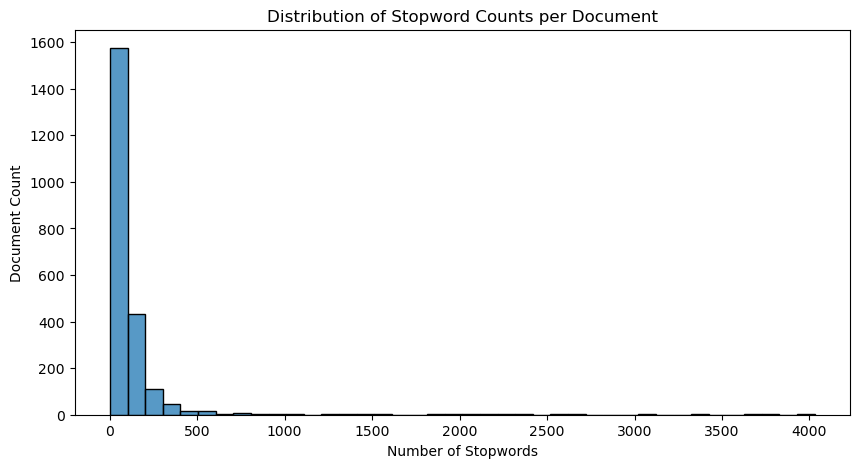

In [20]:
# Distribution of Stopword Counts per Document
df['stopword_count'] = df['text'].apply(lambda x: sum(1 for word in word_tokenize(clean_text(x)) if word.lower() in stop_words))

plt.figure(figsize=(10, 5))
sns.histplot(df['stopword_count'], bins=40)
plt.title("Distribution of Stopword Counts per Document")
plt.xlabel("Number of Stopwords")
plt.ylabel("Document Count")
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

In the testing and exploratory analysis phase, we applied our preprocessing pipeline to a single document from the dataset to verify the effectiveness and integrity of our text cleaning process. Specifically, we selected the post at index 25 as a representative sample; however, this step can be repeated for any document to ensure that preprocessing behaves consistently across varied inputs.

We began by displaying the original unprocessed text to visually assess its structure and content. The next step involved cleaning the text using the clean_text function, which removed URLs, punctuation, and numeric characters, and standardized all characters to lowercase. This made the text more uniform and reduced potential sources of noise that could otherwise disrupt token matching or inflate the vocabulary.

Before fully normalizing the text, we performed an intermediate tokenization to count the number of stopwords present in the cleaned version. This helped quantify how much low-value linguistic content would be filtered out. Removing stopwords helps reduce dimensionality and focus the model on semantically rich terms that are more useful for classification.

I applied the tokenize_and_normalize function, which tokenized the cleaned text, removed stopwords, and applied lemmatization to reduce each word to its base form. This step significantly reduces vocabulary fragmentation caused by tense, plurality, or inflection.

Finally, we tested the complete wrapper function preprocess_text, which combines all preprocessing steps into one streamlined call. This ensures consistency and scalability when applied across the entire dataset.

By validating the preprocessing pipeline on an individual document, we confirmed that each step behaves as expected and that the outputs are interpretable, meaningful, and ready for vectorization. This testing process is crucial for identifying anomalies and debugging before full-scale application.

# Token Frequency Analysis (TF-IDF)

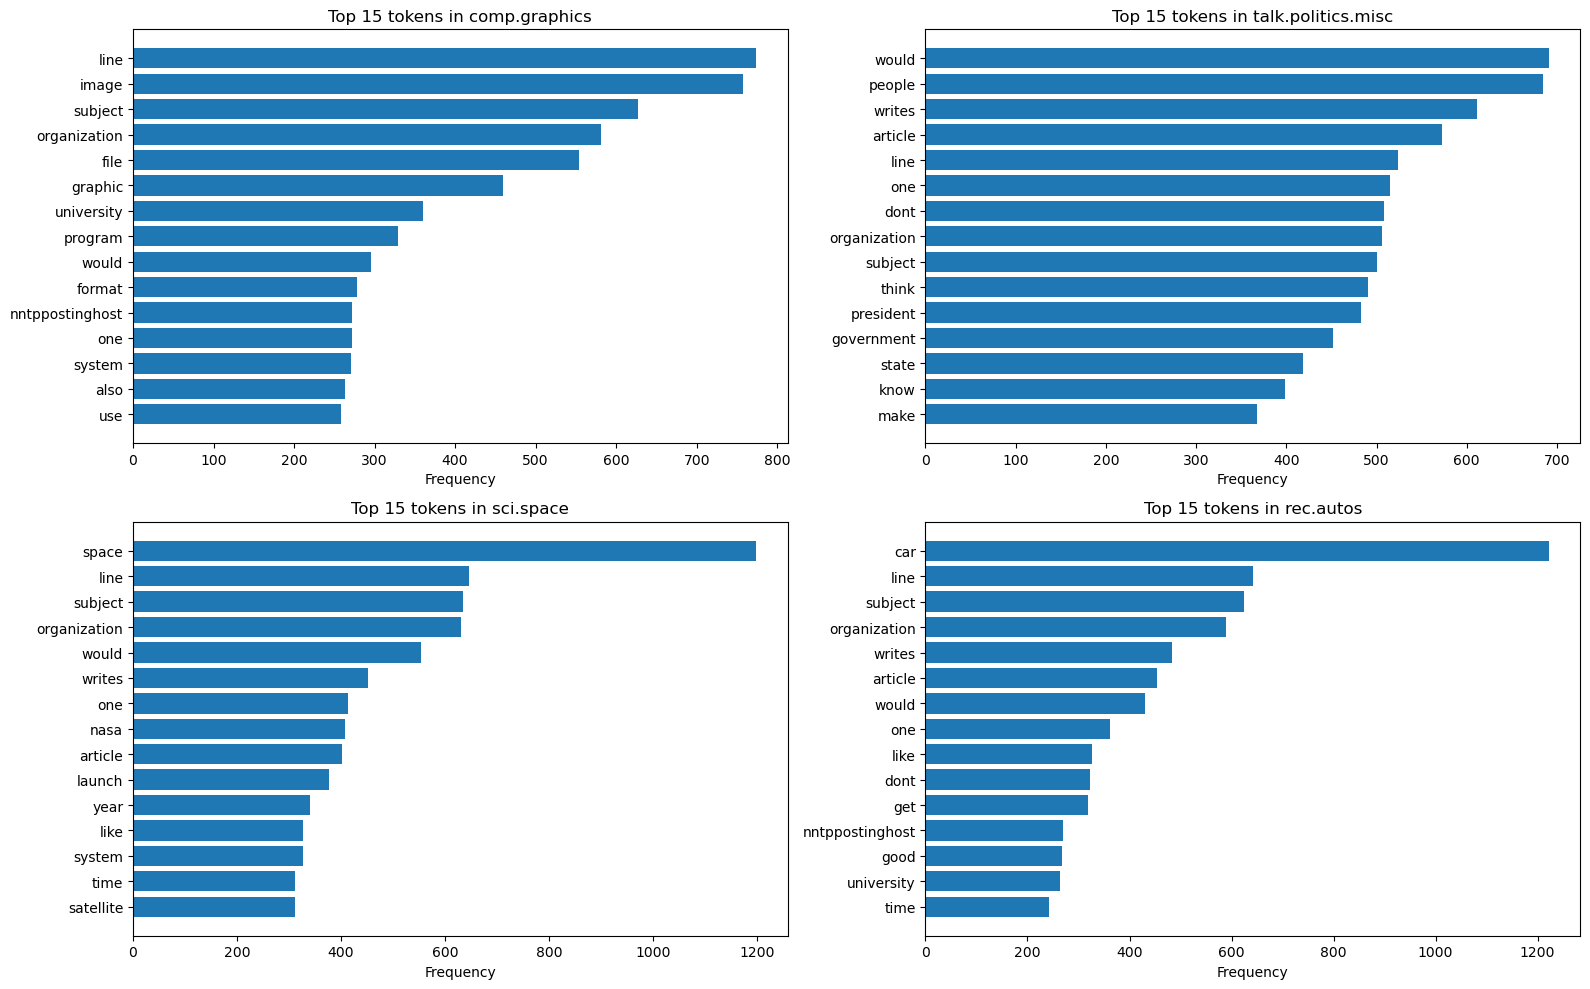

In [21]:
# Create a copy to store processed tokens
df['processed_tokens'] = df['text'].apply(lambda x: tokenize_and_normalize(clean_text(x), remove_stopwords=True, lemmatize=True))

# Initialize dictionary to hold token frequencies per category
category_tokens = {}

# Aggregate tokens by category
for category in df['category'].unique():
    all_tokens = []
    for tokens in df[df['category'] == category]['processed_tokens']:
        all_tokens.extend(tokens)
    category_tokens[category] = Counter(all_tokens).most_common(15)  # Top 15 tokens

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, category in enumerate(category_tokens.keys()):
    token_counts = category_tokens[category]
    tokens, counts = zip(*token_counts)
    
    axes[idx].barh(tokens, counts)
    axes[idx].set_title(f"Top 15 tokens in {category}")
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Different categories in the dataset exhibit distinct vocabulary patterns that reflect their domain-specific language. For example, the rec.autos category frequently includes terms like “car,” “drive,” and “engine,” while sci.space contains terms such as “orbit,” “launch,” and “nasa.” Similarly, talk.politics.misc emphasizes words like “government,” “state,” and “president,” contrasting with comp.graphics, which includes terms like “image,” “file,” and “graphic.” Recognizing these patterns is crucial for model selection and feature engineering. For instance, a bag-of-words model may benefit from TF-IDF weighting to downplay generic words and highlight these domain-specific terms. Moreover, this insight can guide feature selection or category-specific preprocessing when building classification models, as it suggests that discriminative terms vary significantly across classes.

These differences reinforce the need for class-aware preprocessing or weighting schemes to prevent dominant terms in one category from overpowering subtle yet important signals in others

# N-grams Analysis

In [22]:
# Helper function to extract n-grams from a list of token lists
def get_top_ngrams(token_lists, n=2, top_k=20):
    """
    Get top n-grams from a list of tokenized documents.

    Parameters
    ----------
    token_lists : list of lists
        Tokenized texts
    n : int
        n-gram size (e.g., 2 for bigrams, 3 for trigrams)
    top_k : int
        Number of most common n-grams to return

    Returns
    -------
    List of tuples
        Most common n-grams with their counts
    """
    all_ngrams = ngrams([token for doc in token_lists for token in doc], n)
    return Counter(all_ngrams).most_common(top_k)

In [23]:
# Top 20 unigrams
unigram_counts = Counter([token for doc in df['processed_tokens'] for token in doc])
print("Top 20 Unigrams:\n", unigram_counts.most_common(20))

Top 20 Unigrams:
 [('line', 2586), ('subject', 2387), ('organization', 2307), ('would', 1969), ('writes', 1792), ('article', 1664), ('one', 1562), ('space', 1287), ('dont', 1282), ('car', 1262), ('like', 1209), ('university', 1149), ('get', 1147), ('people', 1119), ('know', 1059), ('think', 1050), ('time', 1036), ('nntppostinghost', 1021), ('also', 963), ('new', 915)]


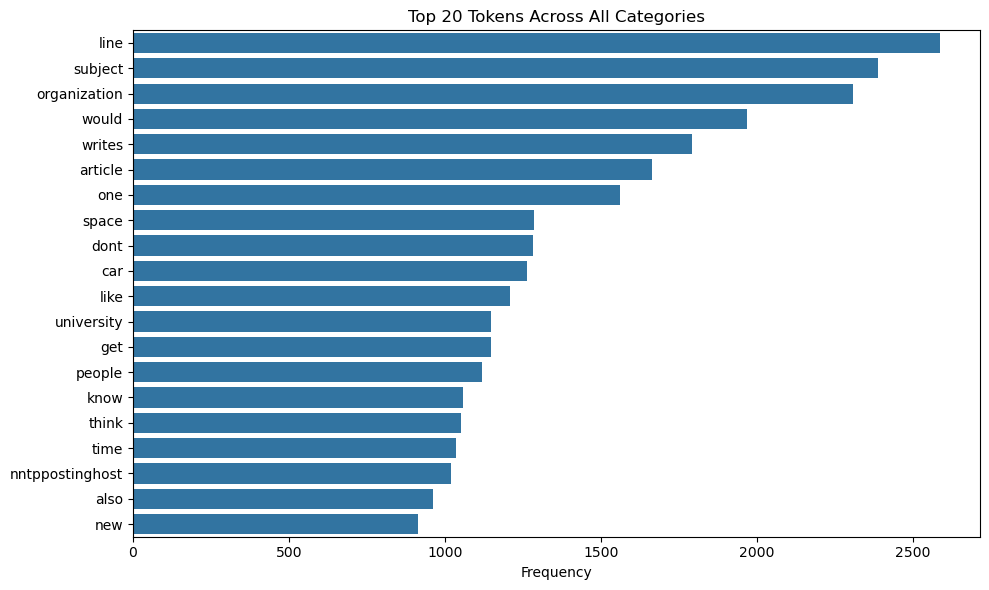

In [27]:
# Top 20 Tokens Across All Categories
top_unigrams = Counter([token for doc in df['processed_tokens'] for token in doc]).most_common(20)
tokens, counts = zip(*top_unigrams)

tokens, counts = zip(*top_unigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=tokens)
plt.title("Top 20 Tokens Across All Categories")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
The chart above highlights the top 20 most frequent tokens across all categories in the dataset. Common words like "line," "subject," and "organization" appear frequently, likely due to their presence in email headers or forum metadata rather than meaningful content. While some domain-relevant terms like "space," "car," and "university" do appear, the prevalence of generic or structural tokens reinforces the importance of preprocessing and feature selection. Removing boilerplate text or weighting tokens using TF-IDF could help focus the model on more informative features.

In [28]:
# Top 20 bigrams
top_bigrams = get_top_ngrams(df['processed_tokens'], n=2, top_k=20)
print("\nTop 20 Bigrams:")
for bg, count in top_bigrams:
    print(f"{' '.join(bg)}: {count}")


Top 20 Bigrams:
line article: 607
writes article: 419
line nntppostinghost: 381
organization university: 378
dont know: 211
distribution world: 207
line distribution: 204
usa line: 199
distribution usa: 146
dont think: 131
would like: 121
united state: 120
world nntppostinghost: 116
university line: 114
clayton cramer: 114
anyone know: 111
state university: 110
new york: 106
space station: 102
health care: 99


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusion and Recommendations**

Our preprocessing pipeline effectively transformed raw text into clean, structured, and tokenized data, enabling deeper insight into category-specific language patterns. Through stopword removal, lemmatization, and token frequency analysis, we identified domain-relevant terms across categories such as rec.autos, sci.space, talk.politics.misc, and comp.graphics. This preprocessing lays a strong foundation for building robust classification models.

Key findings indicate that each category uses a distinct vocabulary that reflects its domain (e.g., "car" in autos, "orbit" in space, "government" in politics), which is critical for feature engineering. These patterns suggest that techniques like TF-IDF weighting or category-specific keyword extraction can significantly improve model accuracy by emphasizing discriminative terms.

From a business perspective, the ultimate goal is to automate document categorization—improving routing, indexing, or content recommendations based on topic. The insights from our analysis support this by demonstrating that categories are linguistically distinguishable, which bodes well for downstream classification performance. Additionally, our analysis suggests that outliers in text length or generic terms should be handled carefully to avoid noise in feature representation.

By aligning preprocessing and feature engineering with category-specific language, we enhance the system's ability to accurately route or classify documents, improving both efficiency and user satisfaction in a real-world NLP-driven business setting.